# Tarea 4: procesamiento de texto parte 2

Importando librerias importante para esta tarea 

In [57]:
#procesamiento del texto 
import pandas as pd 
import os 
import numpy as np 
import nltk 
from nltk.corpus import stopwords
from nltk import bigrams
from itertools import chain
import string
#representación del texto 
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx


In [58]:
textonegative= os.path.join('data', 'moviereviews_nega.txt')
texttablenega=pd.read_table(textonegative, header=None)

In [59]:
textopositive=os.path.join('data','moviereviews_pos.txt')
texttablepos=pd.read_table(textopositive, header=None)

In [60]:
texttablenega.drop(columns=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
texttablepos.drop(columns=[1,2,3,4,5,6],inplace=True)
texttablenega.dropna(subset=[0],inplace=True)
texttablepos.dropna(subset=[0],inplace=True)
texttablepos.reset_index(inplace=True)
texttablenega.reset_index(inplace=True)

In [61]:
Puntos= string.punctuation
texttablenega[0]=texttablenega[0].str.lower()
texttablepos[0]=texttablepos[0].str.lower()
texttablenega[0]=texttablenega[0].str.replace('['+Puntos+']','', regex=True)
texttablepos[0]=texttablepos[0].str.replace('['+Puntos+']','', regex=True)

Creando los bigramas

In [62]:
bigramasposi= [bigrams(eachWord.split()) for eachWord in texttablepos[0]]

In [63]:
pairposi= list(chain(*bigramasposi))
pairposi

[('if', 'you'),
 ('you', 'like'),
 ('like', 'original'),
 ('original', 'gut'),
 ('gut', 'wrenching'),
 ('wrenching', 'laughter'),
 ('laughter', 'you'),
 ('you', 'will'),
 ('will', 'like'),
 ('like', 'this'),
 ('this', 'movie'),
 ('movie', 'if'),
 ('if', 'you'),
 ('you', 'are'),
 ('are', 'young'),
 ('young', 'or'),
 ('or', 'old'),
 ('old', 'then'),
 ('then', 'you'),
 ('you', 'will'),
 ('will', 'love'),
 ('love', 'this'),
 ('this', 'movie'),
 ('movie', 'hell'),
 ('hell', 'even'),
 ('even', 'my'),
 ('my', 'mom'),
 ('mom', 'liked'),
 ('liked', 'itbr'),
 ('itbr', 'br'),
 ('br', 'great'),
 ('great', 'camppositive'),
 ('this', 'a'),
 ('a', 'fantastic'),
 ('fantastic', 'movie'),
 ('movie', 'of'),
 ('of', 'three'),
 ('three', 'prisoners'),
 ('prisoners', 'who'),
 ('who', 'become'),
 ('become', 'famous'),
 ('famous', 'one'),
 ('one', 'of'),
 ('of', 'the'),
 ('the', 'actors'),
 ('actors', 'is'),
 ('is', 'george'),
 ('george', 'clooney'),
 ('clooney', 'and'),
 ('and', 'im'),
 ('im', 'not'),
 ('not

In [64]:

bigramasnega= [bigrams(eachword.split()) for eachword in texttablenega[0]]

pairWordsnega = list(chain(*bigramasnega))


In [65]:
pairWordsnega

[('encouraged', 'by'),
 ('by', 'the'),
 ('the', 'positive'),
 ('positive', 'comments'),
 ('comments', 'about'),
 ('about', 'this'),
 ('this', 'film'),
 ('film', 'on'),
 ('on', 'here'),
 ('here', 'i'),
 ('i', 'was'),
 ('was', 'looking'),
 ('looking', 'forward'),
 ('forward', 'to'),
 ('to', 'watching'),
 ('watching', 'this'),
 ('this', 'film'),
 ('film', 'bad'),
 ('bad', 'mistake'),
 ('mistake', 'ive'),
 ('ive', 'seen'),
 ('seen', '950'),
 ('950', 'films'),
 ('films', 'and'),
 ('and', 'this'),
 ('this', 'is'),
 ('is', 'truly'),
 ('truly', 'one'),
 ('one', 'of'),
 ('of', 'the'),
 ('the', 'worst'),
 ('worst', 'of'),
 ('of', 'them'),
 ('them', 'its'),
 ('its', 'awful'),
 ('awful', 'in'),
 ('in', 'almost'),
 ('almost', 'every'),
 ('every', 'way'),
 ('way', 'editing'),
 ('editing', 'pacing'),
 ('pacing', 'storyline'),
 ('storyline', 'acting'),
 ('acting', 'soundtrack'),
 ('soundtrack', 'the'),
 ('the', 'films'),
 ('films', 'only'),
 ('only', 'song'),
 ('song', 'a'),
 ('a', 'lame'),
 ('lame', 

Eliminamos las duplas que contengan **STOPWORDS**

In [66]:
STOPS= stopwords.words('english')
pairnega_clean = [gram for gram in pairWordsnega if not any(stop in gram for stop in STOPS)]
pairposi_clean= [gram for gram in pairposi if not any (stop in gram for stop in STOPS )]

Creando una tabla de frecuencias de bigramas 

In [67]:
biagramposi= Counter(pairposi_clean)
biagramposidf=pd.DataFrame(biagramposi.most_common(),
                           columns= ['Bigram', 'weight'])
biagramposidf

,Bigram,weight
0,"(br, br)",3
1,"(bad, film)",2
2,"(karen, carpenter)",2
3,"(like, original)",1
4,"(original, gut)",1
...,...,...
189,"(crown, jewel)",1
190,"(devil, wears)",1
191,"(wears, prada)",1
192,"(great, comedy)",1


In [68]:
biagramnega= Counter(pairnega_clean)
biagramnegasidf=pd.DataFrame(biagramnega.most_common(),
                           columns= ['Bigram', 'weight'])
biagramnegasidf

,Bigram,weight
0,"(something, similar)",2
1,"(theyve, taken)",2
2,"(positive, comments)",1
3,"(looking, forward)",1
4,"(film, bad)",1
...,...,...
232,"(straighttovideo, movies)",1
233,"(saw, back)",1
234,"(good, one)",1
235,"(standardsbr, br)",1


Creando dos columnas en las nuevas bases de datos

In [69]:
biagramnegasidf['word1'], biagramnegasidf['word2']= zip(*biagramnegasidf['Bigram'])
biagramposidf['word1'], biagramposidf['word2']= zip (*biagramposidf['Bigram'])

In [70]:
posi_bigram=nx.from_pandas_edgelist(df=biagramposidf, source='word1', target= 'word2', edge_attr=['weight'])
nega_bigram= nx.from_pandas_edgelist(df=biagramnegasidf, source= 'word1', target= 'word2', edge_attr=['weight'] )

Graficando 

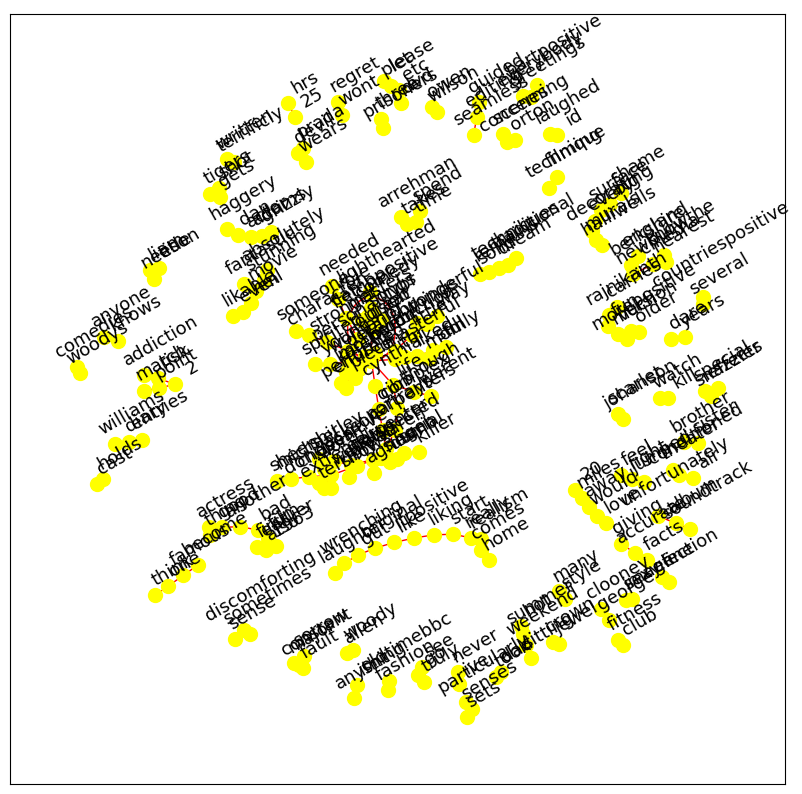

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(posi_bigram)

# Plot networks
nx.draw_networkx(posi_bigram, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()

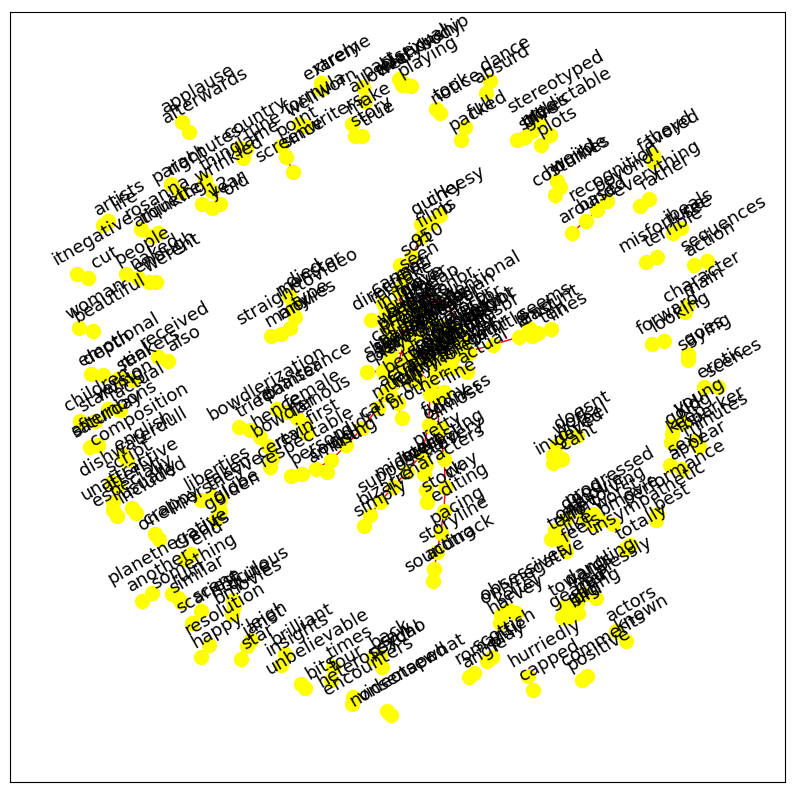

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(nega_bigram)

# Plot networks
nx.draw_networkx(nega_bigram, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()

Subsetting

In [73]:
biagramnegasidf_1= biagramnegasidf[biagramnegasidf['weight']>=1]
biagramposidf_1= biagramposidf[biagramposidf['weight']>=1]

In [74]:
Gbiagramposi_1=nx.from_pandas_edgelist(df=biagramposidf_1, source='word1',target= 'word2',edge_attr= ["weight"])
Gbiagramnega_1=nx.from_pandas_edgelist(df=biagramnegasidf_1, source='word1',target= 'word2',edge_attr= ["weight"])

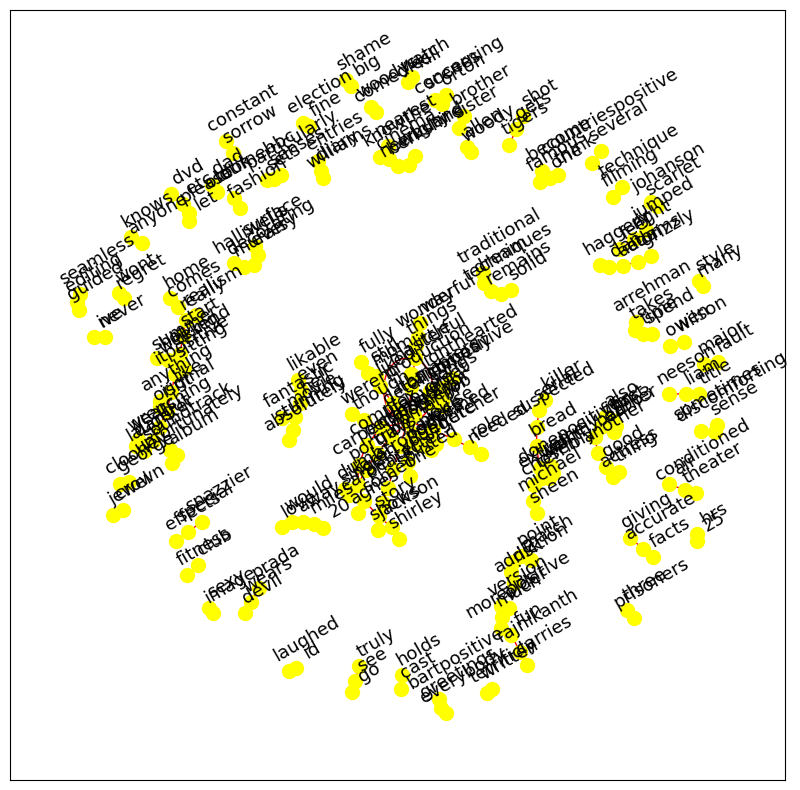

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(Gbiagramposi_1)

# Plot networks
nx.draw_networkx(Gbiagramposi_1, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()

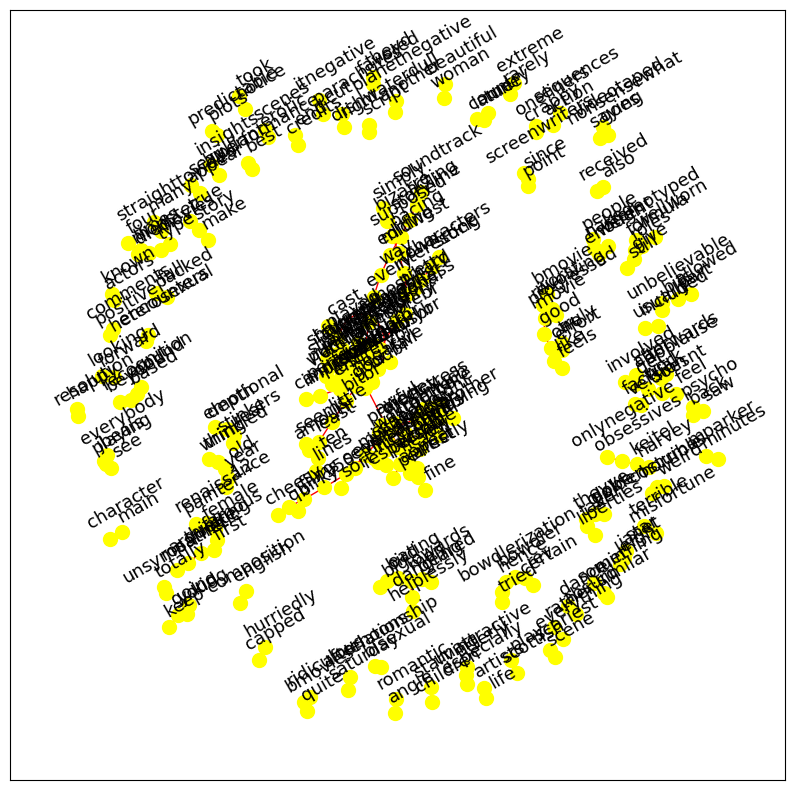

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(Gbiagramnega_1)

# Plot networks
nx.draw_networkx(Gbiagramnega_1, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()